<a href="https://colab.research.google.com/github/ShrutiNaik12/ShrutiNaik12-Coin-Versus-Scrap-Recognition-using-Convolutional-Neural-Networks/blob/master/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Epoch 1/20
33/33 [==============================] - 100s 3s/step - loss: 1.4676 - accuracy: 0.6761 - val_loss: 0.4102 - val_accuracy: 0.8226
Epoch 2/20
33/33 [==============================] - 96s 3s/step - loss: 0.4109 - accuracy: 0.8343 - val_loss: 0.3550 - val_accuracy: 0.8679
Epoch 3/20
33/33 [==============================] - 97s 3s/step - loss: 0.3676 - accuracy: 0.8617 - 

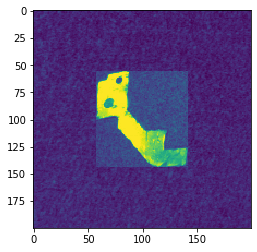

The Predicted Testing image is =COIN verify below


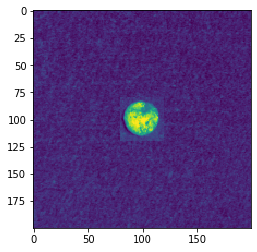

The Predicted Testing image is =COIN verify below


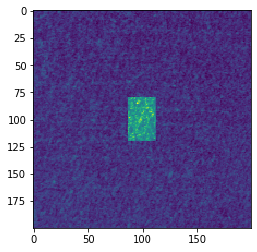

The Predicted Testing image is =COIN verify below


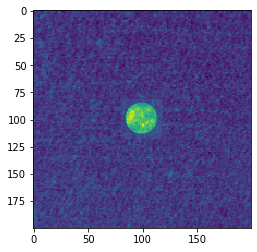

The Predicted Testing image is =COIN verify below


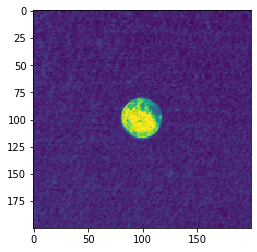

The Predicted Testing image is =COIN verify below


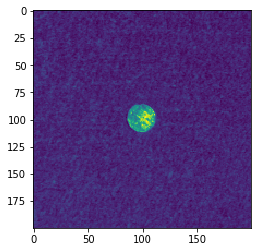

The Predicted Testing image is =SCRAP verify below


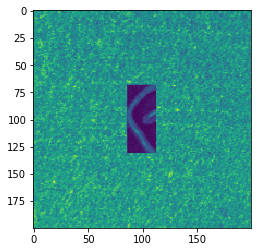

The Predicted Testing image is =SCRAP verify below


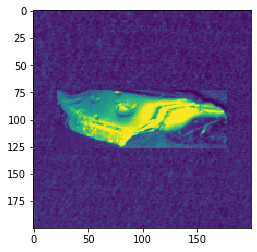

The Predicted Testing image is =COIN verify below


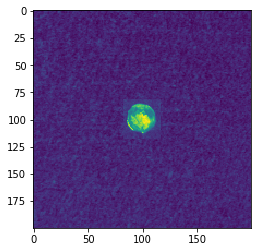

The Predicted Testing image is =COIN verify below


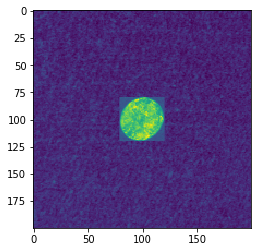

In [1]:
import numpy as np
import os,cv2
import tensorflow as tf
import glob
import random as rn
from sklearn.utils import shuffle
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

import re

from keras.utils import np_utils
# from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
os.environ['PYTHONHASHSEED'] = '0' 
# Setting the seed for numpy-generated random numbers 
np.random.seed(37) 
# Setting the seed for python random numbers 
rn.seed(1254) 
# Setting the graph-level random seed. 
tf.set_random_seed(89) 
from keras import backend as K 
session_conf = tf.ConfigProto( intra_op_parallelism_threads=1, inter_op_parallelism_threads=1) 
#Force Tensorflow to use a single thread 
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf) 
K.set_session(sess)

#def sorted_aphanumeric(data):
#    convert = lambda text: int(text) if text.isdigit() else text.lower()
 #   alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
  #  return sorted(data, key=alphanum_key)

def gen_image(arr):
    two_d = (np.reshape(arr, (200, 200)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    return plt
  
def unique(list1): 
      
    # insert the list to the set 
    list_set = set(list1) 
    # convert the set to the list 
    unique_list = (list(list_set)) 
    for x in unique_list: 
        print(x)
        


from google.colab import drive
drive.mount('/content/drive')

PATH = os.getcwd()
# Define data path
data_path = '/content/drive/My Drive/Colab Notebooks/Coin_Recognition_Assignment_Dataset_folder/Training'   # inset your path

data_dir_list = os.listdir(data_path) #sorted_aphanumeric(os.listdir(data_path)) 

# Define the number of classes
num_classes = 2

labels_name={'COIN':0,'SCRAP':1} 

img_data_list=[]
labels_list = []

for dataset in data_dir_list:
    img_list = glob.glob(data_path+'/'+ dataset +'/*.jpg')
    
    label = labels_name[dataset] # label is generated as the library updated above
    for img in img_list:
        input_img=cv2.imread(img,1 )
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(200,200))
        img_data_list.append(input_img_resize)
        labels_list.append(label)

#print(unique(labels_list))
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')

labels = np.array(labels_list)

#print(unique(labels))
#print(np.unique(labels,return_counts=True))
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)

X_train, X_validation, y_train, y_validation = train_test_split(x, y, test_size=0.2, random_state=2) # divide data into train and validation

#Normalization of the data
X_train = X_train / 255
X_validation = X_validation / 255

Nv = X_train.shape[0]
Nv_validation = X_validation.shape[0]

#reshape data to fit model
X_train = X_train.reshape(int(Nv),200,200,1)
X_validation = X_validation.reshape(int(Nv_validation),200,200,1)

model = Sequential()
##################   add model layers described in the assignment   #######################
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(200,200,1))) 
        # 64 are the number of filters, kernel size is the size of the filters example 3*3 here. activation used is relu.finally shape of the image
#model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# 8. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
 
# 9. Fit model on training data
#model.fit(X_train, y_train, batch_size=32, nb_epoch=10, verbose=1,shuffle=False, validation_data = (X_validation, y_validation))
data_generator = ImageDataGenerator(vertical_flip=True,horizontal_flip=True) 
data_generator.fit(X_train) 
model.fit_generator(data_generator.flow(X_train, y_train, batch_size=32),steps_per_epoch=len(X_train) // 32,epochs=20,validation_data=(X_validation, y_validation),verbose=1)
#steps_per_epoch=len(X_train) // 32,

# Define data path
datatest_path = '/content/drive/My Drive/Colab Notebooks/Coin_Recognition_Assignment_Dataset_folder/Testing'   # inset your path

datatest_dir_list = os.listdir(data_path) #sorted_aphanumeric(os.listdir(datatest_path))  

# Define the number of classes
#num_classes = 2

labelstest_name={'COIN':0,'SCRAP':1} 

imgtest_data_list=[]
labelstest_list = []

for dataset in data_dir_list:
    imgtest_list = glob.glob(data_path+'/'+ dataset +'/*.jpg')
    
    labeltest = labelstest_name[dataset] # label is generated as the library updated above
    for img in imgtest_list:
        inputtest_img=cv2.imread(img,1 )
        inputtest_img=cv2.cvtColor(inputtest_img, cv2.COLOR_BGR2GRAY)
        inputtest_img_resize=cv2.resize(inputtest_img,(200,200))
        imgtest_data_list.append(inputtest_img_resize)
        labelstest_list.append(labeltest)

#print(unique(labels_list))
imgtest_data = np.array(img_data_list)
imgtest_data = img_data.astype('float32')

labelstest = np.array(labels_list)

#print(unique(labels))
print(np.unique(labelstest,return_counts=True))
Y = np_utils.to_categorical(labelstest, num_classes)

#Shuffle the dataset
X_test,y_test = shuffle(imgtest_data,Y, random_state=2)

# X_train = X_train / 255
X_test = X_test / 255

# Nv = X_train.shape[0]
Nv_test = X_test.shape[0]

#reshape data to fit model
# X_train = X_train.reshape(int(Nv),200,200,1)
X_test = X_test.reshape(int(Nv_test),200,200,1)
# 10. Evaluate model on test data
score = model.evaluate(X_test, y_test, verbose=1)

print('Testing accuracy - > ',score[1] * 100)
 
ytested = model.predict_classes(X_test)
for i in range(10):
  print("The Predicted Testing image is =%s verify below" % ((list(labels_name.keys())[list(labels_name.values()).index(ytested[i])])))
  gen_image(X_test[i]).show() # printing image vs the predicted image below
  




In [4]:
!pip install tensorflow==1.15

     |████████████████████████████████| 412.3MB 41kB/s 
     |████████████████████████████████| 512kB 31.7MB/s 
     |████████████████████████████████| 3.8MB 44.6MB/s 
  Found existing installation: tensorflow-estimator 2.0.1
    Uninstalling tensorflow-estimator-2.0.1:
      Successfully uninstalled tensorflow-estimator-2.0.1
  Found existing installation: tensorboard 2.0.2
    Uninstalling tensorboard-2.0.2:
      Successfully uninstalled tensorboard-2.0.2
  Found existing installation: tensorflow 2.0.0
    Uninstalling tensorflow-2.0.0:
      Successfully uninstalled tensorflow-2.0.0
